**NB ROOT su notebook fa pena crasha di continuo, non usarlo MAI. Qui usato solo per averer spiegazioni, codici e risultati insieme**

# ROOT
Root è un framework dotato di routine di analisi dati, statistica, grafici e metodi avanzati di input/output

Root ha un interprete built-in (cling) che in realtà è un just in time compiler ed è dotato di un wrapper python

## I/O
Le informazioni vengono salvatge e lette in  formato colonnare. Ovvero ogni riga corrisponde a un evento. Un evento può avere un numero arbitrario di particelle a cui sono associati diversi dati (energia, etc.)
In una semplice lista python avremmo un tensore in cui ogni riga possiede un numero di colonne variabile e sarebbe molto difficile da gestire

L'interprete di ROOT supporta dei comandi speciali che hanno come prefisso un punto
- .q: chiudi root
- .! usa comandi di sistema
- .L file_name carica una macro (Per creare una macro basta scrivere un file cpp chiamato Macroname con dentro una funzione MacroName) per poi chiamarla quando si vuole. La macro viene eseguita JIT
- .L file_name+ In questo modo la macro viene compilata e viene generata una shared library
- .help help sui comandi speciali

Per compilare un programma cpp che include pacchetti di root bisogna usare la seguente flag
`root-config --cflags --libs`

## Files
In ROOT i file vengono gestiti dalla classe TFile. I TFile sono bei binari aventi un  header e un record e possono essere compressi.

I TFile hanno una struttura logica simile a quella di un filesystem ovvero hanno una gerarchia di directory.
Inoltre sono auto descrittivi cioè l'informazione che serve per leggere il file è nel file stesso (possiamo leggerlo in qualsiasi modo senza dover usare per forza le classi root)

Per scrivere i file ci sono 3 passaggi:
1. Serializzazione: Bisogna convertire i dati in un blob di byte evitando loop e seguendo i puntatori correttamente. Inoltre è necessario che la serializzazione sia indipendente dall' enviroment.
   Dato l'header file della classe viene creato un dizionario
2. Compressione
3. Scrittura

Per creare un file bisogna istanziare un oggetto TFile("path","OPZIONE"). Se non passiamo alcuna opzione significa che stiamo aggendo in sola lettura. Tipicamente si usa **"RECREATE"** per scrivere e sovrascrivere un file o **UPDATE** per aggiungere roba al file

Per scrivere un oggetto nel file basta usare oggetto.Write() Poi bisogna chiudere il file

**Anche qui c'è l'idea stupida del current open file.**:
Per cambiare il current file bisogna usare il comando old_file.cd()


Altri comandi sono:
- .GetObject("nome_oggetto",nome_variabile) Per leggere un oggetto e scriverlo in variabile (bisogna prima creare la variabile e deve essere un puntatore)
- .GetListOfKeys() ritorna un iterabile contenente tutti gli oggetti scritti nel file e con .GetName() sul singolo elemento si può ottenere il nome

Per mostrare il contenuto del file basta fare .ls()

In [1]:
TFile f("file.root","RECREATE");
TH1F h("histo","histo",100,0,100);
h.Write();
f.Close();

### Formato colonnare
I dati sono divisi in blocchi di righe contenenti gli eventi (**entries**) e in colonne contenenti dati diversi (es. impulso, angoli...) (**branches**)

Questi dati però non èpossono essere rappresentati in vettori perchè hammp una struttura gerarchica ad albero
![title](img/file.png)

Questa rappresentazione è efficiente sia a Runtime (non bisogna leggere per forza tutto se ci interessa solo una parte dei dati), sia per quanto riguarda lo storage (poichè ogni colonna contiene dati simili tra loro e la loro compressione diventa più efficiente)

### TTree
Il formato colonnare in un file root è rappresentato dai TTree.
Le colonne del tree sono i branch e le righe sono una entry

Per mostrare l'header del tree basta usare .Print() mentre per vedere il contenuto si fa .Scan()

#### TNtuple
TNtuple tuple("nome","titolo","x,y");

Una versione semplificata è la **TNtuple** ovvero un tree che ha come branch delle singole variabili numeriche.
Possiamo fare plot sulle NTuple usando il metodo .Draw("formula","mask")
(ad esempio se vogliamo il prodotto dell'impulso x e y considerando solo le entries con pz>0 è tuple.Draw("px*py","pz>0"))

In realtà quella non è una mask ma un peso, in questo caso abbiamo usato una espressione booleana quindi è una mask ma possiamo anche decidere di pesare i nostri px*py con pz stesso

#### tree
Per creare delle Bracnhce dopo aver costruito il tree bisogna fare
tree.Branch("nome_branch",&variabile) dove &variabile è l'indirizzo di memoria che contiene il dato da aggiungere nel branche

Dopo che in x mettiamo il dato che ci interessa facciamo tree.Fill() e in questo modo aggiungiamo una entries

Per leggerlo invece si usa l'oggetto TTreeReader("tree_name_to_read", &Tfile_name)


In [ ]:
//Leggere un tree///////
////////////////////////
Tile f("file.root");

//creo un reader
TTreeReader reader("tree_name",&f);



//creo iterabile su un branch
TTreeReaderValue<Object_type> BR(reader,"branch_name");

while(reader.Next()){
    for (auto &obj : *BR){
        //operazioni sull'oggetto
    }
}


**GetEntry e SetBranchAddress**:

Con setbranchaddress possiamo indicare in quale variabile andremo a salvare, riga per riga durante il loop, le variabili contenute in un branch.
Con GetEntry(i) salviamo il valore del branch selezionato della riga i-esima nella variabile indicata.
In questo modo possiamo anche fillare un istogramma

GetEntries() torna il numero totale di entries

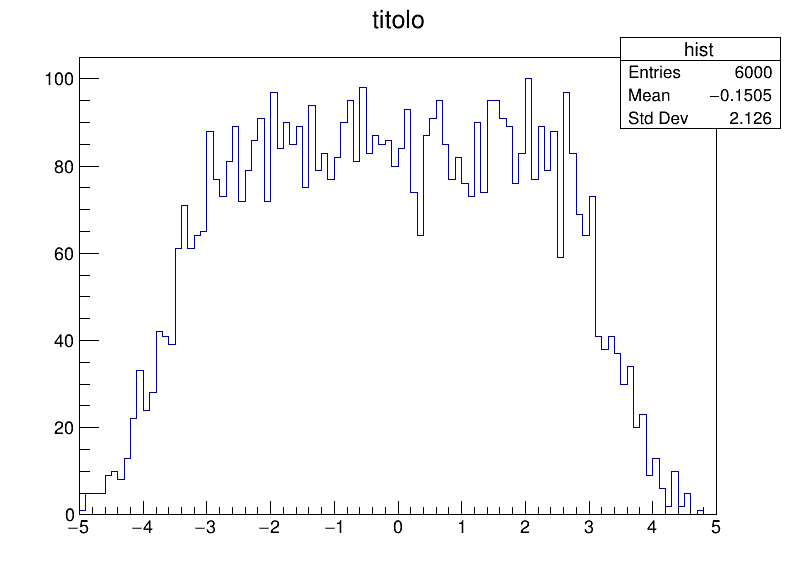

-2.76399
-0.700133
3.40716
-3.179
0.966825
0.213785
0.400743
0.977202
-1.18358
3.33764
-1.77756
-0.550516
2.31707
-0.69357
3.44478
0.805933
2.9454
-0.250374
0.244502
-1.04132
3.63932
1.26324
-0.0856677
-2.32349
3.31253
1.94756
0.808617
0.104169
-1.8533
-1.6884
2.07752
1.6017
2.34762
0.731699
0.832727
-0.127946
0.738942
0.548425
2.14617
-0.342502
-1.26554
2.33295
-3.49182
-1.22444
3.00268
-3.37521
0.584566
-0.604552
1.41408
0.709119
-2.7034
-3.40546
-3.38913
-0.785474
0.389459
1.67353
0.534893
-2.19834
1.64771
-0.860418
2.80776
-0.86413
0.050993
2.39432
1.07084
1.54503
-2.53222
3.46916
2.62004
-3.58756
-3.57309
0.098688
-3.22658
2.9649
0.0612267
-2.44757
0.496136
-2.36778
1.55584
-0.899758
0.310858
1.44602
-0.0530723
-1.15486
3.22851
0.477506
-3.34795
1.65458
0.706772
2.64049
0.84325
0.0930533
-2.22381
1.22681
-2.07455
0.917042
-3.06119
-1.12425
0.0489407
0.675557
-1.75152
1.27117
-1.12889
-2.93552
0.731293
-0.607006
2.09242
-0.139901
-2.22358
-0.700569
-1.77548
-3.36126
2.65687
-0.4773

In [1]:
float px;
TFile f("inputdata.root");
TTree *t = (TTree*)f.Get("TreeB"); //con Get selezioniamo un tree
TH1F hist("hist","titolo",100,-5,5);
TCanvas c("c","c",800,600);
t->SetBranchAddress("var1", &px);

for(int i=0; i<t->GetEntries(); i++){
    t->GetEntry(i);
    hist.Fill(px);
    cout << px << endl;
}

hist.Draw();
c.Draw();



### Scrivere oggetti custom
Se nelle branch vogliamo scrivere oggetti custom deco prima fenerare i dizionari dell'oggetto
**gInterpreter->GenerateDictionary("object_name","object_name.h")

Per leggerli invece possiamo caricare le shared library con gSystem->Load("AutoDict_objectname_cxx.so")

## Istogrammi
La classe che gestisce gli istogrammi è TH1. Da questa eredita TH1F (F sta per float) che è la più usata ma anche TH2 e TH3 che è una cosa abbastanza stupida poichè un istogramma 2d o 3d non è un caso particolare di istogramma a una dimensione

Per disegnare un istogramma bisogna creare un'istanza TH1F che ha come parametri("nome_hist","titolo",num_bin,xinf,xsup)

Per mostrarlo bisogna creare un TCanvas ("nome", "titolo",height, width) e poi fare hist.Draw() e  canv.Draw()
(canvas )
**NB In root c'è una variabile interna che si chiama current TCanvas che, a meno che non venga cambiata a mano, corrisponde all'ultima TCanvas creata. Lo stesso vale quando si fa il fill dell'istogramma. (E' una porcheria, non è neanche thread safe)

La canvas corrente è nella variabile builtin gpad. **E' un puntatore globale (gPad->SetGrid() equivale a lastcanvascreated.SetGrid())

**NB In una macro è necessario creare TH1F con new allocandolo nell'heap altrimenti come si esce dallo scope della funzione l'istogramma viene distrutto (nel caso si crei una macro conviene ritornare il puntatore). Ricorda che poi va distrutto. In modalità interattiva si può evitare**

Volendo possiamo riempire l'istogramma con numeri casuali con FillRandom.

### Opzioni sugli istrogrammi
Gli istogrammi possono essere personalizzati sia con altri comani come.SetFillColor(colore), sia passando delle stringhe a .Draw() (Es. "E" per gli errori.Di default root mette errori poissoniani sui bin)
Per disegnare altra roba sopra un istrogramma già esistente bisogna usare l'opzione SAME.  Per usare più opzioni basta attaccare le stringhe insieme senza separatori
Per salvarli si usa il comando .SaveAs(name.png) sulla canvas

Le tabelle riassuntive presenti di default negli istogrammi possono essere modificate usando variabili interne globali come gStyle->SetOptStat() e a questa funzione va passata una sequenza di 0 e 1 per decidere quali info mostrare e quale no

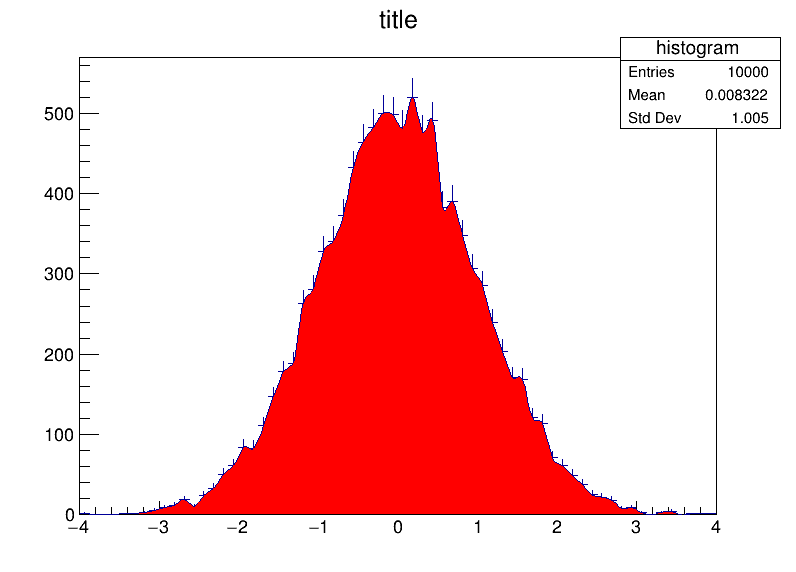

In [1]:
TH1F *hist =new TH1F("histogram","title",64,-4,4);
TCanvas c("myCanvasName","The Canvas Title",800,600);
hist->FillRandom("gaus",10000);

//hist->Draw("E"); //Il comando E disegna istogramma con errori
hist->Draw("E");
hist->SetFillColor(kRed); //riempie istogramma
hist->Draw("SAMEC"); //Ridisegna la stessa cosa ma con una linea continua riempita di rosso
c.Draw();


# Funzioni
Le funzioni sono rappresentate dalla classe TF1 (da R a R, ci sono anche TF12, TF2, TF3).
Root è dotato di algoritmi numerici per calcolare derivate e integrali delle TF1

Le TF1 possono essere istanziate in 2 modi:
- Come stringhe (inoltre esistono delle funzioni builtin tipo "gaus" per la gaussiana media 0 varianza 1)
- Come funzioni C++ o lambdas

I parametri si esprimono con parentesi quadre



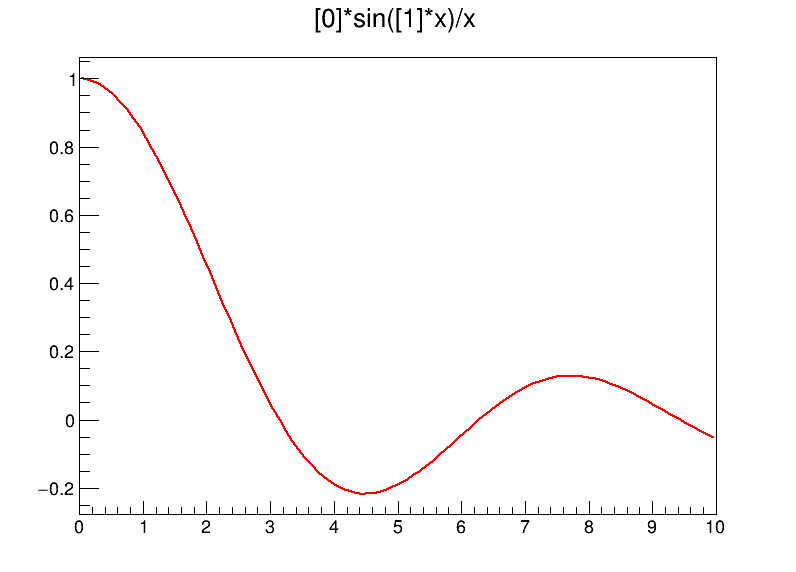

In [1]:
//Plot di funzione (qui non uso f1= new TF1 ma in uno script va fatto per forza in questo modo)
TCanvas c("myCanvasName","The Canvas Title",800,600);

//0 e 1 sono parametri
TF1 f1("nome","[0]*sin([1]*x)/x",0.,10.);
f1.SetParameters(1.,1.);
f1.Draw();
c.Draw();

# TGraph
E' una sorta di scatterplot(molto simile al .plot di matlotlib)

Per aggiungere un punto al TGraph bisogna usare .SetPoint(num_punto,x,y) *Per gli istogrammi si usa Fill*

Opzioni:
- .SetMarkerStyle e .SetMarkerSize Per campbiare marker
- .SetMarkerColor e SetLineColor per cambiare colore del marker o della linea
- .SetLineStyle .SetLineWidth per cambiare stile e grandezza della linea
- .SetTitle("titolo;asse x; assey") Per cambiare titolo e label assi oppure per gli assi graph->GetXaxis()->SetTitle("xlabel")
- ci sono altri comandi tipo per la trasparenza


Se si vuole un TGraph con le bande di errore bisogna usare TGraphErrors(n_points,x_vals,y_vals,x_err,y_err);


Se si vuole fare un fit sul TGraph basta fare tgraph.Fit("nome_funz_da_fittare") (oppure al posto del nome della funzione si può passare il puntatore alla funzione)

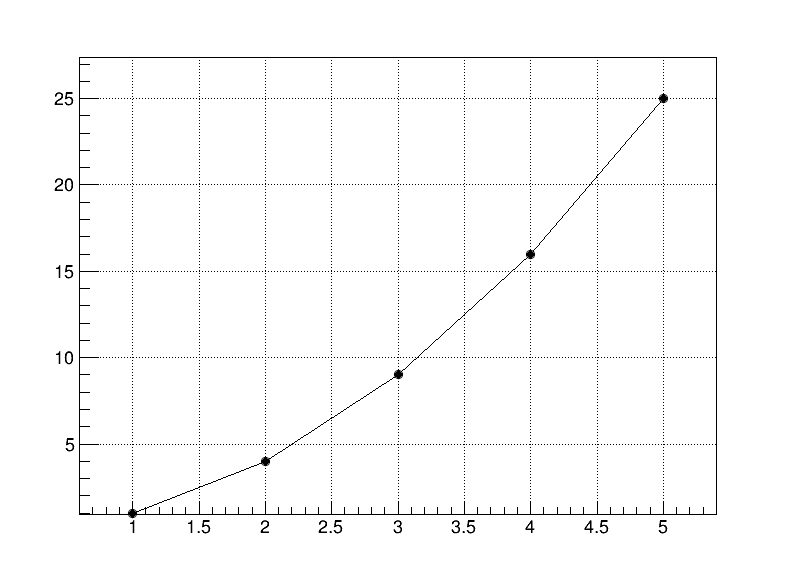

In [1]:

#include <tuple>
#include <vector>
using namespace std;
TGraph g;
TCanvas  c ("myCanvasName","The Canvas Title",800,600);
vector<double> points {1,2,3,4,5};
for (auto [idx,x]=tuple{0,points.begin()}; x != points.end(); ++idx, ++x) {
    g.SetPoint(idx,*x,(*x)*(*x));
}
g.SetMarkerStyle(kFullCircle);
g.Draw("APL");
c.SetGrid();
c.Draw();

**Opzioni sulla canvas**:
- .SetGrid() mette griglia
- TLatex text(x,t,"testo"); test.Draw();  scrive del testo in latex sul grafico
- TBox() o TEllipse per creare dei box
- TArrow per mostrare delle frecce sul grafico
- .SetLogx() .SetLogy() per la scala logaritmica

**Legenda**
Per creare una leggenda bisogna creare un oggetto TLegend(x_up,y_up,x_down,y_down,"title") (dove le coord sono quelle degli angoli della legenda)
Per aggiungere elementi alla leggenda .AddEntry(Oggetto,"titolo", "OPZIONI") (opzioni sono colore e stile del filling. Metti stesse opzioni dell'oggetto disegnato)
E per disegnarla .Draw()

Volendo esiste un metodo per generare una leggenda automaticamente gPad->BuildLegend()


**Stili grafici**

Lo stile corrente è contenuto nel puntatore globale **gStyle**.
Gli stili sono gestiti dalla classe TStyle e un utente può definire il proprio stile (di solito ogni esperimento crea il proprio. I built-in sono Plain, Bold, Pub, Modern (di default))

# Plot 2D

## Colormap
Possiamo fare delle colormap tramite la classe TH2F e quando facciamo draw usiamo l'opzione "colz" (ovvero colora la coordinata z)
La colormap di default è kBird (EVITA LA RAINBOW ASSOLUTAMENTE)
 

# TODO:
Capisci bene GetEntry e GetEntries e SetBranchAddress("Branch_name",&var) serve a leggere e caricare un branch in una variabile (sempre branch dichiarata prima)

Rivedi il coso che genera il codice

# Machine learning TMVA

Questa libreria fornisce diversi modelli come i boosted decision tree, NN, SVM, etc. oltre a fornire un' interfaccia a librerie esterne come scikit-learn, keras, tensorflow,  pytorch, R,etc.

Inutile che approfondiamo la sintassi, guarda tutorial e documentazione se interessato (conviene usarlo in pyroot. La sintassi è abbastanza noiosa in quanto tutti gli argomenti delle funzioni vanno passate come stringhe)



# RDataFrame

Sarebbe l'equivalente di pandas in python ed è molto comodo per evitare di scrivere righe e righe di codice solo per dire cosa leggere e come.

Con i DataFrame basta fare una query SQL-like, in questo modo il codice rimane pulito ed efficiente (poichè la libreria è fortemente ottimizzata, anche in parallelo)

Per creare un dataframe basta ROOT::RDataFrame("tree_name","file_name") (o al posto del file name il puntatore al TFile) (oppure si può passare direttamente un puntatore al tree)

Si possono anche concatenare tree di più file (al posto di "filename" su usa {"file1","file2"} oppure si possono usare lec
 regex "fileprefix*.root")

Alcune opzioni utili sono: (filter e defina accettano anche funzioni o lambdas)
- .Filter("condizioni booleane o pesi") per fare una mask o pesare i data
- .Hist1D({hist_inizializer},"var_da_plottare","pesi") (i pesi sono opzionali e si possono sfruttare come mask) (l'inizializer dell'istogramma è opzionale) (funziona anche se i valori )
- .Define("new_var","expression") Crea una nuova colonna come funzione delle colonne esistenti
- .Mean("var") fa la media su una colonna
- .Range(start,stop,step) E' uno slicing (end=0 significa fino alla fine) **NB sono disponibili sono in single thread**
- .Snapshot("tree_name",file) per salvare il dataframe su disco
- .Display({"column_1",...,"column_n"},num_row) genera un puntatore e con ->Print() mostra le prime num_row del dataframe

Posso anche creare un dataframe vuoto con N entrie e poi riempirlo usando define e le lambda

Ovviamente tutti questi comandi si possono concatenare


**NB: Tutto viene calcolato in modo lazy in modo da fare più cose nella stesso loop ed evitare loop multiplti. Ad esempio sugli istogrammi il loop sui dati avviene nel momento in cui si fa il Draw e se abbiamo più dataframe con diversi filtri il loop sui dati è comunque unico, non avvengono più loop**

**In questo modo evitiamo gli OuterLoop ma non gli InnerLoop (es. cerca la particella con il più alto pt. loop esterno = su eventi, loop interno = su pt)**

L'idea di base è che ogni volta che si fa un'operazione su un dataframe si aggiunge un nodsono vettorio ad un grafo in modo che quando viene avviato il loop a causa di una chiamata tutte le operazioni vengono eseguite andando avanti nel grafo


![title](img/dataframe.png)


Se diamo un nome al filtro (.Filter("expr","nome_filtro")) e sul dataset facciamo .Report() verranno mostrate anche delle statistiche riguardanti l'efficienza delle operaazioni

*Ci sono tante funzioni anche per leggere dati in formati diversi*

## Funzioni extra

- **Parallelo**: Basta scrivere all'inizio ROOT::EnableImplicitMT(); per far si che le operazioni avvengano in multithreading
- .Foreach() esegui una funzione su ogni entry (NB: non thread safe di per se, l'utente deve fare attenzione)
- .ForeachSlot() stessa cosa di foreach ma ritorna il numero del thread che sta eseguendo l'operazione
- .Aggregate per eseguire delle operazioni che aggregano
- Fill per riempire un oggetto con un branch
- .Graph() filla un tgraph con le colonne selezionate
- .Max()/min/StdDev/sum ritrorna max/min/stdev/sum colonne
- .Take() estrae una colonna e torna un RVec



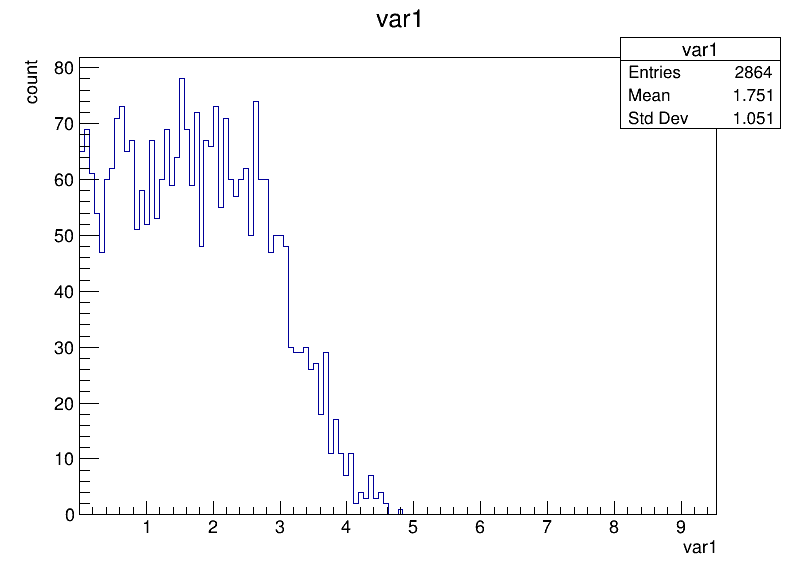

In [1]:
TCanvas c ("myCanvasName","The Canvas Title",800,600);
ROOT::RDataFrame df("TreeB","inputdata.root");
auto h=df.Filter("var1>0").Histo1D({"var1"});
h->Draw(); //Il loop sui dati avviene qui non quando viene creata h. Tutto viene calcolato in modo lazy in modo da fare più cose nella stesso loop ed evitare loop multiplti
c.Draw();

In [8]:
ROOT::RDataFrame d(100);
auto new_d=d.Define("rand1",[](){return rand();});
new_d.Display({"rand1"},10)->Print();

+-----+------------+
| Row | rand1      | 
+-----+------------+
| 0   | 1726303036 | 
+-----+------------+
| 1   | 1670913756 | 
+-----+------------+
| 2   | 4915210    | 
+-----+------------+
| 3   | 76624930   | 
+-----+------------+
| 4   | 323020009  | 
+-----+------------+
| 5   | 835573460  | 
+-----+------------+
| 6   | 646048251  | 
+-----+------------+
| 7   | 1510548173 | 
+-----+------------+
| 8   | 109947131  | 
+-----+------------+
| 9   | 1554603317 | 
+-----+------------+


## RVec
RDataFrame vede gli array come degli oggetti RVec che sono molto simili ai vector della standard library ma hanno funzioni aggiuntive come operazioni tra vettori.

Sui RVec è possibile eseguire un set di operazioni chiamate ROOT::VecOps:

- [] L'operatore parentesi quadre è simile a quello per i numpy array, sia ritorna elemento sia è utile per effettuare una mask
- All("expr")/Any() Torna true solo se tutti/almeno uno soddisfano al condizione
- Argmin()/Argmax()/Argsort()/Max/Min
- Dot(v1,v2) Prodotto scalare
- Filter fa una mask
- Intersect(v1,v2) torna intersezione
- Map applica funzione su tutti elementi
- Take(v,idx_v) ritorna gli elementi con gli indici selezionati
- Where(condition, v1,v2) Ritorna v1 se condition True altrimenti v2
